   ### 기능 : 추출한 문장에서 단어 분석

In [69]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

#내용획득

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.05.01&searchTermEndDate=2020.05.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)

#형태소 분석을 통해 명사만 리스트에 따로 저장

noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

#단어와 그 단어가 몇번 쓰였는지 알기 위핸 for문    

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break
                    
#파일 저장

f1 = open('SBS5월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["5월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

#워드클라우드로 만들기 위해 dict형으로 변환하기 위한 작업

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS5월워드클라우드.jpg')

# SBS (1-5월)

In [147]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv

kkma = Kkma()

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.04.01&searchTermEndDate=2020.04.30&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)

noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('SBS4월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["4월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

f1.close()
                    
#딕셔너리 형태로 바꾸기 {단어 : 개수}                    

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS4월워드클라우드.jpg')

In [26]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.03.01&searchTermEndDate=2020.03.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)

noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('SBS3월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["3월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS3월워드클라우드.jpg')

<class 'str'>


In [86]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.02.01&searchTermEndDate=2020.02.29&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('SBS2월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["2월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS2월워드클라우드.jpg')

In [100]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

article_title = []
article_detail = []
for i in range(1,6):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.01.01&searchTermEndDate=2020.01.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=4'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('SBS1월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["1월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS1월워드클라우드.jpg')

# 한겨레(1-5월)

In [ ]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv
from konlpy.tag import Kkma
kkma = Kkma()

article_title = []
article_detail = []
for i in range(0,3):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%9819&media=news&submedia=&sort=s&period=all&datefrom=2020.01.01&dateto=2020.01.31&pageseq={}'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    
    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):#
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('한겨레1월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["1월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레1월워드클라우드.jpg')

In [31]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv
from konlpy.tag import Kkma
kkma = Kkma()

article_title = []
article_detail = []
for i in range(0,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&media=news&submedia=&sort=s&period=all&datefrom=2020.02.01&dateto=2020.02.29&pageseq={}'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    
    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):#
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('한겨레2월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["2월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레2월워드클라우드.jpg')

In [38]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv
from konlpy.tag import Kkma
kkma = Kkma()

article_title = []
article_detail = []
for i in range(0,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&media=news&submedia=&sort=s&period=all&datefrom=2020.03.01&dateto=2020.03.31&pageseq={}'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    
    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):#
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('한겨레3월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["3월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레3월워드클라우드.jpg')

In [135]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv
from konlpy.tag import Kkma
kkma = Kkma()

article_title = []
article_detail = []
for i in range(0,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&media=news&submedia=&sort=s&period=all&datefrom=2020.04.01&dateto=2020.04.30&pageseq={}'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    
    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):#
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('한겨레4월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["4월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레4월워드클라우드.jpg')

In [151]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv
from konlpy.tag import Kkma
kkma = Kkma()

article_title = []
article_detail = []
for i in range(0,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%98&media=news&submedia=&sort=s&period=all&datefrom=2020.05.01&dateto=2020.05.31&pageseq={}'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    
    driver.quit()
    #print(details)
    #print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)
                    
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):#
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('한겨레5월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["5월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레5월워드클라우드.jpg')

In [191]:
def SBS_select(month,n):
    f = open('SBS{}월.csv'.format(month), 'r', encoding='utf-8')


    rdr = csv.reader(f)

    num = []
    word = []

    for line in rdr:
        word.append(line[0])
        num.append(line[1])

    f.close()

    f1 = open('SBS{}월-1.csv'.format(month),'w',encoding = 'utf-8',newline='')

    wr1 = csv.writer(f1)

    wr1.writerow([str(month)+"월단어", " 개수"])
    for i in range(1,len(num)):
        if(int(num[i])>n):
            wr1.writerow([word[i],num[i]])

    f1.close()

In [183]:
import pandas as pd

df = pd.read_csv('total_sbs.csv',index_col='SBS단어',encoding = 'utf-8')
df

,1월,2월,3월,4월,5월
SBS단어,,,,,
코로나,32,931,998,984,824
코로나19,0,905,970,993,729
브라질,1,9,26,40,45
미국,2,21,97,93,99
중국,10,141,50,97,59
영국,1,6,19,44,33
백신,0,7,8,16,36
유럽,2,14,34,35,32
일본,2,78,62,102,128


In [243]:
import pandas as pd

df = pd.read_csv('SBS1월-1.csv',encoding = 'utf-8')
df

,1월단어,개수
0,진자,8
1,신종,17
2,코로나,32
3,2,7
4,중국,6
5,우,22
6,신,7
7,종,7
8,진,9
9,명,14


In [8]:
import pandas as pd

df = pd.read_csv('SBS2월-1.csv',encoding = 'utf-8')
df

,2월단어,개수
0,코로나,931
1,코로나19,905
2,19,908
3,1,88
4,천,54
5,신천지,31
6,만,41
7,명,281
8,대,37
9,대구,53


In [62]:
import pandas as pd

df = pd.read_csv('SBS3월-1.csv',encoding = 'utf-8')
df

,3월단어,개수
0,세계,34
1,코로나,988
2,코로나19,970
3,19,975
4,진자,127
5,사망,66
6,확산,96
7,유럽,34
8,환자,68
9,미국,61


In [185]:
import pandas as pd

df2 = pd.read_csv('SBS4월-1.csv',encoding = 'utf-8')
df2

,4월단어,개수
0,미국,57
1,코로나,984
2,코로나19,933
3,19,941
4,감염,46
5,일,58
6,신규,89
7,진,118
8,2,74
9,5,40


In [205]:
SBS_select(1,5)

In [184]:
import pandas as pd

df = pd.read_csv('SBS5월-1.csv',encoding ='utf-8')
df

,5월단어,개수
0,코로나,824
1,코로나19,729
2,19,740
3,확산,60
4,브라질,45
5,속,31
6,여,31
7,5,33
8,천,92
9,만,186


In [6]:
import pandas as pd

df = pd.read_csv('total_hani.csv',index_col='한겨레단어',encoding = 'utf-8')
df

,1월,2월,3월,4월,5월
한겨레단어,,,,,
코로나,6,746,984,628,443
코로나19,0,430,770,377,213
일본,1,33,15,21,21
감염,1,64,33,35,61
사망자,0,34,33,23,5
환자,4,75,65,53,28
중국,7,79,21,22,24
확산,3,55,38,17,23
대구,0,97,110,40,12


In [219]:
import pandas as pd

df = pd.read_csv('한겨레1월-1.csv',encoding ='utf-8')
df

,1월단어,개수
0,코로나,6
1,우,11
2,폐렴,10
3,중국,7


In [227]:
import pandas as pd

df = pd.read_csv('한겨레2월-1.csv',encoding ='utf-8')
df

,2월단어,개수
0,대,53
1,코로나,746
2,신종,192
3,진자,152
4,코로나19,430
5,19,439
6,만,32
7,지역,43
8,신,83
9,종,80


In [229]:
import pandas as pd

df = pd.read_csv('한겨레3월-1.csv',encoding ='utf-8')
df

,3월단어,개수
0,코로나,984
1,코로나19,770
2,19,774
3,지원,37
4,대응,37
5,감염,33
6,명,243
7,중,42
8,번째,46
9,사망자,33


In [231]:
import pandas as pd

df = pd.read_csv('한겨레4월-1.csv',encoding ='utf-8')
df

,4월단어,개수
0,코로나,628
1,코로나19,377
2,19,380
3,총선,35
4,감염,35
5,환자,53
6,대,33
7,병원,33
8,진,71
9,진자,79


In [234]:
hani_select(5,30)

In [235]:
import pandas as pd

df = pd.read_csv('한겨레5월-1.csv',encoding='utf-8')
df

,5월단어,개수
0,코로나,443
1,코로나19,213
2,19,218
3,미,35
4,진,101
5,중,45
6,4,37
7,만,64
8,명,138
9,3,50


## (11)프로젝트를 위해 본인이 직접 개발한 python 소스코드 원본

In [ ]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
from konlpy.tag import Kkma
import csv
kkma = Kkma()

#내용획득

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    
    driver.get('https://news.sbs.co.kr/news/search/main.do?pageIdx={}&searchTermStartDate=2020.05.01&searchTermEndDate=2020.05.31&searchSection=01%7C02%7C03%7C07%7C08%7C09%7C14&searchCategory=&searchMode=&query=%EC%BD%94%EB%A1%9C%EB%82%9819&collection=nnews&searchOption=3&sort=RANK'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')

    
    articles = soup.find_all('strong',attrs = {'class':'psil_tit'})
    details = soup.find_all('p',attrs = {'class':'psil_txt'})

    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)
        
#txt = article_title
#kkma.pos(txt)

#형태소 분석을 통해 명사만 리스트에 따로 저장

noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

#단어와 그 단어가 몇번 쓰였는지 알기 위핸 for문    

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break
                    
#파일 저장

f1 = open('SBS5월.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr1.writerow(["5월단어", " 개수"])
for i in range(len(count)):
    wr1.writerow([count_text[i],count[i]])

#워드클라우드로 만들기 위해 dict형으로 변환하기 위한 작업

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)

In [255]:
#찾고싶은 단어 찾기
def find_sbsword(month,word):
    df=pd.read_csv('SBS{}월.csv'.format(month),encoding='utf-8')
    finding = df['{}월단어'.format(month)]==word
    A=df[finding]
    return A

In [257]:
#찾고싶은 단어 찾기
def find_haniword(month,word):
    df=pd.read_csv('한겨레{}월.csv'.format(month),encoding='utf-8')
    finding = df['{}월단어'.format(month)]==word
    A=df[finding]
    return A

In [267]:
word_list = ['코로나','코로나19','일본','감염','사망자','환자','중국','확산','대구','신천지','정부','문','대통령','지원','대응','미국','경북','신규','트럼프']
print("=======5==========")
for word in word_list:
    print(find_haniword(5,word))
print("=======4==========")
for word in word_list:
    print(find_haniword(4,word))
print("=======3==========")
for word in word_list:
    print(find_haniword(3,word))
print("=======2==========")
for word in word_list:
    print(find_haniword(2,word))
print("=======1==========")
for word in word_list:
    print(find_haniword(1,word))


=======5==========
  5월단어   개수
1  코로나  443
    5월단어   개수
2  코로나19  213
    5월단어   개수
390   일본   21
    5월단어   개수
222   감염   61
   5월단어   개수
50  사망자    5
    5월단어   개수
218   환자   28
    5월단어   개수
249   중국   24
    5월단어   개수
369   확산   23
    5월단어   개수
154   대구   12
    5월단어   개수
540  신천지    5
    5월단어   개수
782   정부   16
    5월단어   개수
213    문   19
    5월단어   개수
214  대통령   19
    5월단어   개수
287   지원   23
   5월단어   개수
80   대응   10
   5월단어   개수
79   미국   27
     5월단어   개수
1844   경북    3
    5월단어   개수
250   신규   12
   5월단어   개수
94  트럼프   24
=======4==========
  4월단어   개수
4  코로나  628
     4월단어   개수
10  코로나19  377
   4월단어   개수
95   일본   21
   4월단어   개수
55   감염   35
    4월단어   개수
378  사망자   23
   4월단어   개수
65   환자   53
    4월단어   개수
114   중국   22
    4월단어   개수
198   확산   17
    4월단어   개수
562   대구   40
    4월단어   개수
675  신천지    4
    4월단어   개수
983   정부   20
    4월단어   개수
166    문   40
    4월단어   개수
167  대통령   38
    4월단어   개수
144   지원   34
    4월단어   개수
170   대응   24
    4월단어   개수
358   미국   41


In [256]:
word_list = ['코로나','코로나19','브라질','미','미국','중','중국','영국','백신','유럽','일','일본','러시아','확산','사망자','감염','세계','신규','환자','이탈리아','사망','하루','추가','국내','대구','서울','경기','경북','인천','부천']
print("=======5==========")
for word in word_list:
    print(find_word(5,word))
print("=======4==========")
for word in word_list:
    print(find_word(4,word))
print("=======3==========")
for word in word_list:
    print(find_word(3,word))
print("=======2==========")
for word in word_list:
    print(find_word(2,word))
print("=======1==========")
for word in word_list:
    print(find_word(1,word))


=======5==========
  5월단어   개수
5  코로나  824
    5월단어   개수
6  코로나19  729
   5월단어   개수
13  브라질   45
   5월단어   개수
47    미   65
    5월단어   개수
388   미국   34
    5월단어   개수
156    중   20
   5월단어   개수
77   중국   39
   5월단어   개수
93   영국   33
    5월단어   개수
152   백신   36
    5월단어   개수
466   유럽   32
   5월단어   개수
91    일   77
    5월단어   개수
856   일본   51
     5월단어   개수
1279  러시아   34
   5월단어   개수
12   확산   60
    5월단어   개수
294  사망자   47
   5월단어   개수
80   감염   57
    5월단어   개수
154   세계   40
    5월단어   개수
228   신규   98
    5월단어   개수
416   환자   28
     5월단어   개수
756  이탈리아   26
    5월단어   개수
417   사망   27
    5월단어   개수
920   하루   30
    5월단어   개수
602   추가   25
    5월단어   개수
127   국내   14
    5월단어   개수
768   대구    3
   5월단어   개수
35   서울   13
    5월단어   개수
691   경기   15
   5월단어   개수
31   경북    2
     5월단어   개수
2590   인천    2
   5월단어   개수
38   부천    4
=======4==========
  4월단어   개수
6  코로나  984
    4월단어   개수
7  코로나19  933
    4월단어   개수
243  브라질   40
    4월단어   개수
380    미   27
  4월단어   개수
3   미국   57
   4월단어 

In [196]:
# 월별 전체 단어에서 n회 이상 언급된 단어만 찾아서 다시 파일 만들기
def SBS_select(month,n):
    f = open('SBS{}월.csv'.format(month), 'r', encoding='utf-8')


    rdr = csv.reader(f)

    num = []
    word = []

    for line in rdr:
        word.append(line[0])
        num.append(line[1])

    f.close()

    f1 = open('SBS{}월-1.csv'.format(month),'w',encoding = 'utf-8',newline='')

    wr1 = csv.writer(f1)

    wr1.writerow([str(month)+"월단어", " 개수"])
    for i in range(1,len(num)):
        if(int(num[i])>n):
            wr1.writerow([word[i],num[i]])

    f1.close()

In [2]:
from wordcloud import WordCloud
import csv

sbs_word = []
sbs_num=[]
mon1=[]
mon2=[]
mon3=[]
mon4=[]
mon5=[]



with open('total_sbs.csv','r',encoding='utf-8') as f:
    reader = csv.reader(f)
    
    for txt in reader:  
        sbs_word.append(txt[0])
        mon1.append(txt[1])
        mon2.append(txt[2])
        mon3.append(txt[3])
        mon4.append(txt[4])
        mon5.append(txt[5])
        
        
sbs_word.remove(sbs_word[0])
mon1.remove(mon1[0])
mon2.remove(mon2[0])
mon3.remove(mon3[0])
mon4.remove(mon4[0])
mon5.remove(mon5[0])

for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])


for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나19"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])



for i in range(len(mon1)):
    sum_num=int(mon1[i])+int(mon2[i])+int(mon3[i])+int(mon4[i])+int(mon5[i])
    sbs_num.append(sum_num)
    
last = []

for i in range(len(sbs_word)):
    imsi = []
    imsi.append(sbs_word[i])
    imsi.append(sbs_num[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 400,height = 400)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('SBS워드클라우드.jpg')

In [3]:
from wordcloud import WordCloud
import csv

sbs_word = []
sbs_num=[]
mon1=[]
mon2=[]
mon3=[]
mon4=[]
mon5=[]



with open('total_hani.csv','r',encoding='utf-8') as f:
    reader = csv.reader(f)
    
    for txt in reader:  
        sbs_word.append(txt[0])
        mon1.append(txt[1])
        mon2.append(txt[2])
        mon3.append(txt[3])
        mon4.append(txt[4])
        mon5.append(txt[5])
        
        
sbs_word.remove(sbs_word[0])
mon1.remove(mon1[0])
mon2.remove(mon2[0])
mon3.remove(mon3[0])
mon4.remove(mon4[0])
mon5.remove(mon5[0])

for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])


for k in range(len(sbs_word)-1):
    if(sbs_word[k]=="코로나19"):
        sbs_word.remove(sbs_word[k])
        mon1.remove(mon1[k])
        mon2.remove(mon2[k])
        mon3.remove(mon3[k])
        mon4.remove(mon4[k])
        mon5.remove(mon5[k])



for i in range(len(mon1)):
    sum_num=int(mon1[i])+int(mon2[i])+int(mon3[i])+int(mon4[i])+int(mon5[i])
    sbs_num.append(sum_num)
    
last = []

for i in range(len(sbs_word)):
    imsi = []
    imsi.append(sbs_word[i])
    imsi.append(sbs_num[i])
    last.append(imsi)

new = dict(last)


wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 400,height = 400)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨레워드클라우드.jpg')

처음에는 아래와 같이 가져온 정보를 직접 parsing하려고 하였으나, 결과를 보니 필요없는 것들이 제대로 제거가 되지 않아서 결국 위 처럼 형태소 분석을 하여 해결하였다.

In [1]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#한겨레 100 페이지(기사 약 천개) 

article_title = []
article_detail = []
for i in range(0,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get("http://search.hani.co.kr/Search?command=query&keyword=%EC%BD%94%EB%A1%9C%EB%82%9819&media=news&submedia=&sort=d&period=all&datefrom=2000.01.01&dateto=2020.05.25&pageseq={}".format(i))


    time.sleep(1)

    html  = driver.page_source
    soup =BeautifulSoup(html,'lxml')
    articles = soup.find_all('dt')
    details = soup.find_all('dd',_class = 'detail')
    driver.quit()

    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?():$}…‘’,“”]', '', Title)
        article_title.append(parse)
    for detail in details:
        De = detail.get_text()
        article_detail.append(De)

final =[]

for i in range(len(article_title)):
    new_result = article_title[i].split(" ")
    final.append(new_result)
for j in range(len(article_detail)):
    result = article_detail[j].split(" ")
    final.append(result)

write_file = open('hani.txt','w')
read_file =open('hani.txt','r')

for i in range(len(final)):
    for j in range(len(final[i])):
        text = final[i][j]
        if(text != ''):
            write_file.write(text)
            write_file.write('\n')

write_file.close()

count_text = []
count = []

for i in range(len(final)):
    for j in range(len(final[i])):
        if(final[i][j] not in count_text):
            count_text.append(final[i][j])
            count.append(1)
        elif(final[i][j] in count_text):
            for k in range(len(count_text)):
                if(final[i][j]== count_text[k]):
                    count[k] += 1
                    break


count_file = open('han_count.txt','w')
new_count_file = open('han_new_count.txt','w')
for i in range(len(count)):
    if(count[i] == 1 or count[i] == 2):
        new_count_file.write(count_text[i])
        new_count_file.write('  ')
        new_count_file.write(str(count[i]))
        new_count_file.write('\n')
    else:
        count_file.write(count_text[i])
        count_file.write('  ')
        count_file.write(str(count[i]))
        count_file.write('\n')

count_file.close()
new_count_file.close()

last = []

for i in range(len(count)):
    if(count[i]!=1 or count[i]!=2):
        imsi = []
        imsi.append(count_text[i])
        imsi.append(count[i])
        last.append(imsi)

new = dict(last)

wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('한겨례워드클라우드.jpg')

WebDriverException: Message: chrome not reachable
  (Session info: chrome=83.0.4103.61)


In [44]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import urllib.request
import re
from wordcloud import WordCloud
import csv

article_title = []
article_detail = []
for i in range(1,100):
    driver = webdriver.Chrome()
    #검색 - 관련도순
    driver.get('http://jtbc.joins.com/search/news?page={}&term=%EC%BD%94%EB%A1%9C%EB%82%9819'.format(i))

    time.sleep(1)

    html  = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    articles = soup.find_all('h3')
    details = soup.find_all('div', attrs = {'class':'vod_exp'})
    
    driver.quit()
#    print(details)
#    print(articles)


    for article in articles:
        Title = article.get_text()
        parse = re.sub('[-=.#/?[]()"$}■…‘’,“”]', '', Title)
        article_title.append(parse)

    for detail in details:
        De = detail.get_text()
        parse2 = re.sub('[-=.#/[]?()$}…■‘’,“”]', '', De)
        article_detail.append(parse2)

#print(article_title)
#print(article_detail)

final =[]

for i in range(len(article_title)):
    new_result = article_title[i].split(" ")
    final.append(new_result)
    if(new_result[0] == "[앵커]" or '[기자]' or"\n[인터뷰]" or "\n[맞장토론]"):
        new_result.remove(new_result[0])

for j in range(len(article_detail)):
    result = article_detail[j].split(" ")
    final.append(result)
    if(result[0] == "[앵커]" or '[기자]' or '...' ):
        result.remove(result[0])

#print(final)
'''
write_file = open('jtbc.txt','w')
read_file =open('jtbc.txt','r')

for i in range(len(final)):
    for j in range(len(final[i])):
        text = final[i][j]
        if(text != ''):
            write_file.write(text)
            write_file.write('\n')

write_file.close()
'''
noun_list = []
for i in range(len(article_title)):
    txt = article_title[i]
    noun = kkma.nouns(txt)
    noun_list.append(noun)

count_text = []
count = []

for i in range(len(noun_list)):
    for j in range(len(noun_list[i])):
        if(noun_list[i][j] not in count_text):
            count_text.append(noun_list[i][j])
            count.append(1)
        elif(noun_list[i][j] in count_text):
            for k in range(len(count_text)):
                if(noun_list[i][j]== count_text[k]):
                    count[k] += 1
                    break

f1 = open('JTBC-1.csv','w',encoding = 'utf-8',newline='')
f2 = open('JTBC-2.csv','w',encoding = 'utf-8',newline='')

wr1 = csv.writer(f1)
wr2= csv.writer(f2)
wr1.writerow(["JTBC단어", " 개수"])
wr2.writerow(["JTBC단어","개수"])
for i in range(len(count)):
    if(count[i]<=5):
        wr1.writerow([count_text[i],count[i]])
    else:
        wr2.writerow([count_text[i],count[i]])

f1.close()
f2.close()
#필요없는 것들을 제외하려고 하였으나 실패->형태소 분석 사용
'''
for i in range(len(count_text)):
    if (count_text[i] in '■'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '저작권은'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '바랍니다'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '[앵커]'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '/'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '...'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '[기자]'):
        count_text.remove(count_text[i])
        count.remove(count[i])
    elif (count_text[i] in '기자입니다.'):
        count_text.remove(count_text[i])
        count.remove(count[i])

count_file = open('jtbc_count.txt','w',-1,"utf-8")
new_count_file = open('jtbc_new_count.txt','w',-1,"utf-8")

for i in range(len(count)):
    if(count[i] == 1 or count[i] == 2):
        new_count_file.write(count_text[i])
        new_count_file.write('  ')
        new_count_file.write(str(count[i]))
        new_count_file.write('\n')
    else:
        count_file.write(count_text[i])
        count_file.write('  ')
        count_file.write(str(count[i]))
        count_file.write('\n')

count_file.close()
new_count_file.close()
'''

last = []

for i in range(len(count)):
    imsi = []
    imsi.append(count_text[i])
    imsi.append(count[i])
    last.append(imsi)

new = dict(last)

wc = WordCloud(font_path='BMHANNAPro.ttf',background_color = 'white',width = 800,height = 800)
wc_img = wc.generate_from_frequencies(new)
wc_img.to_file('JTBC워드클라우드.jpg')


IndexError: list index out of range

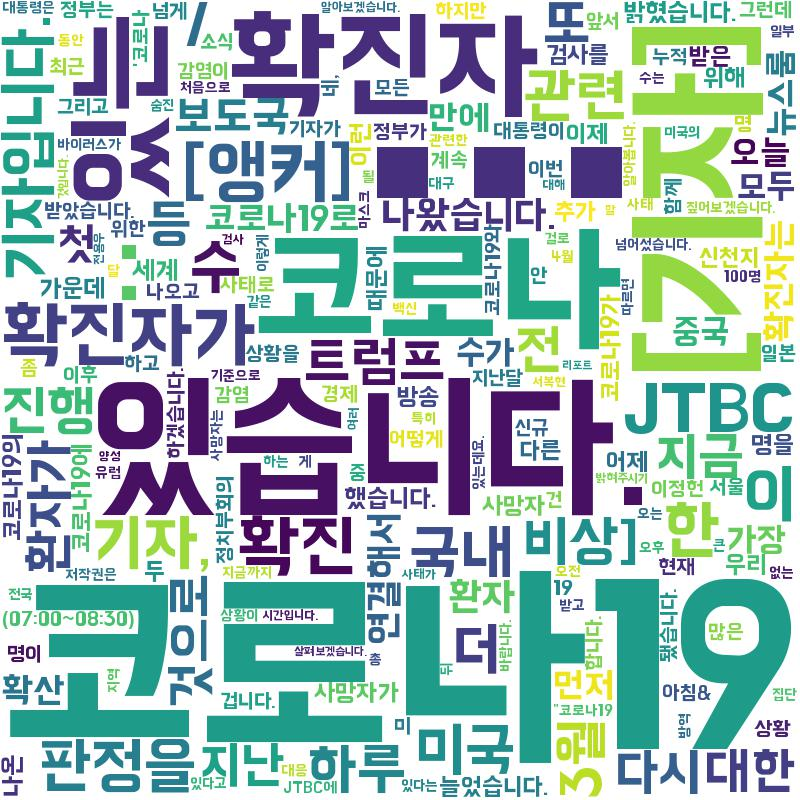

In [53]:
from IPython.display import Image
#실패
Image("JTBC워드클라우드1.jpg")